# Visualize result of Aggregation system
## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

try:
    plt.rc("text", usetex=True)
    plt.rc("font", family="serif")
except:
    pass

plt.rcParams["font.size"] = 10

## Configuration

In [2]:
RES_DIR = "results/aggregation"
MODELS = [
    "projection",
    "hamiltonian",
    "singlempnn",
]
PROPOSED_MODELS = [
    "projection",
    "hamiltonian",
]
LABELS = {
    "projection": "Projection",
    "hamiltonian": "Hamiltonian",
    "singlempnn": "S-MPNN",
}
SAVE_FIG = False

## Load data

In [3]:
ground_truth = np.load(f"{RES_DIR}/data_test.npy")
final_predictions = {}
for m in MODELS:
    final_predictions[m] = np.load(f"{RES_DIR}/{m}/final_prediction.npy")
best_predictions = {}
for m in MODELS:
    best_predictions[m] = np.load(f"{RES_DIR}/{m}/best_prediction.npy")
final_errors = {}
best_errors = {}
for m in MODELS:
    final_errors[m] = np.mean(
        (final_predictions[m] - ground_truth)[:, :, :, :2] ** 2, axis=(2, 3)
    )
    best_errors[m] = np.mean(
        (best_predictions[m] - ground_truth)[:, :, :, :2] ** 2, axis=(2, 3)
    )

In [4]:
def plot_long_term_errors(errors, title=None, err_max=None) -> plt.Axes:
    fig, ax = plt.subplots(figsize=(5, 4))
    if err_max is not None:
        ax.set_ylim(0, err_max)
    for i, m in enumerate(MODELS):
        ax.fill_between(
            np.arange(errors[m].shape[1]),
            errors[m].min(axis=0),
            errors[m].max(axis=0),
            alpha=0.2,
            color=f"C{i}",
        )
        ax.plot(errors[m].mean(axis=0), label=f"{LABELS[m]}", color=f"C{i}")
    ax.legend()
    ax.set_xlabel("Time step")
    ax.set_ylabel("MSE")
    if title is not None:
        ax.set_title(title)
    return ax


def log_plot_long_term_errors(errors, title=None, err_range=None) -> plt.Axes:
    fig, ax = plt.subplots(figsize=(5, 4))
    if err_range is not None:
        ax.set_ylim(err_range[0], err_range[1])
    for i, m in enumerate(MODELS):
        ax.fill_between(
            np.arange(errors[m].shape[1]),
            errors[m].min(axis=0) + 1e-12,
            errors[m].max(axis=0) + 1e-12,
            alpha=0.2,
            color=f"C{i}",
        )
        ax.plot(errors[m].mean(axis=0) + 1e-12, label=f"{LABELS[m]}", color=f"C{i}")
    ax.legend()
    ax.set_xlabel("Time step")
    ax.set_ylabel("MSE")
    if title is not None:
        ax.set_title(title)
    ax.set_yscale("log")
    return fig

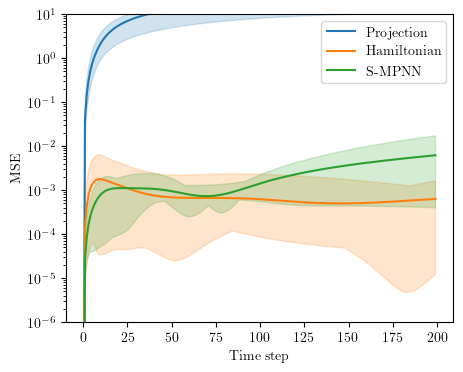

In [5]:
fig = log_plot_long_term_errors(final_errors, err_range=(1e-6, 10))
if SAVE_FIG:
    plt.savefig(f"{RES_DIR}/final_errors.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show(fig)

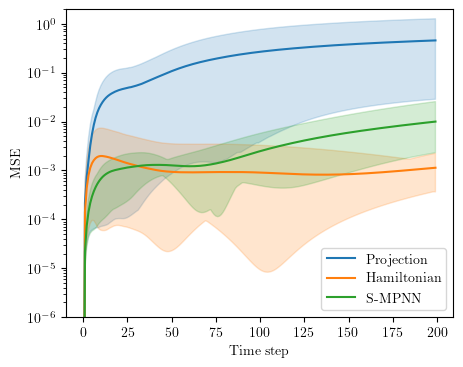

In [6]:
fig = log_plot_long_term_errors(best_errors, err_range=(1e-6, 2))
if SAVE_FIG:
    fig.savefig(f"{RES_DIR}/best_errors.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show(fig)

## Plot scalar functions

Projection


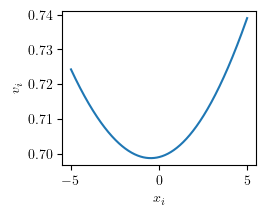

Hamiltonian


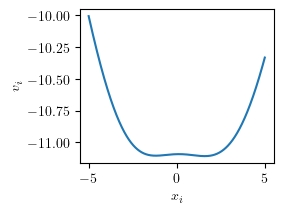

In [7]:
for m in PROPOSED_MODELS:
    print(f"{LABELS[m]}")
    v_each = np.load(f"{RES_DIR}/{m}/best_v_each.npy", allow_pickle=True)
    v_self = v_each[0]["v"].flatten() + v_each[1]["v"].flatten()
    fig, ax = plt.subplots(figsize=(2.5, 2))
    ax.set_xlabel(r"$x_i$")
    ax.set_ylabel(r"$v_i$")
    ax.plot(v_each[0]["x"], v_self)
    if SAVE_FIG:
        fig.savefig(f"{RES_DIR}/{m}_v_self.pdf", bbox_inches="tight", pad_inches=0.05)
    plt.show(fig)
    plt.close()

Projection


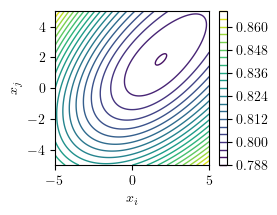

Hamiltonian


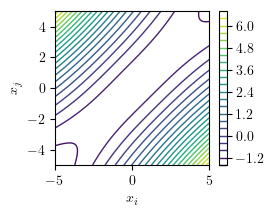

In [8]:
for m in PROPOSED_MODELS:
    print(f"{LABELS[m]}")
    v_pair = np.load(f"{RES_DIR}/{m}/best_v_pair.npy", allow_pickle=True)[0]
    fig, ax = plt.subplots(figsize=(2.5, 2))
    cont = ax.contour(v_pair["x"], v_pair["y"], v_pair["v"], levels=20, linewidths=1.0)
    fig.colorbar(cont, ax=ax)
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x_i$")
    ax.set_ylabel(r"$x_j$")
    if SAVE_FIG:
        plt.savefig(f"{RES_DIR}/{m}_v_pair.pdf", bbox_inches="tight", pad_inches=0.05)
    plt.show()
    plt.close()

## Plot scalar functions of ground truth

In [9]:
def v_self_gt(x, range=(-2, 2)):
    v = np.zeros_like(x)
    v[x < range[0]] = 0.5 * (x[x < range[0]] - range[0]) ** 2
    v[x > range[1]] = 0.5 * (x[x > range[1]] - range[1]) ** 2
    return v

In [10]:
def v_pair_gt(x, y):
    return 0.5 * (x - y) ** 2

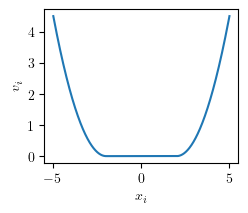

In [11]:
STEPS = 1000
RANGE = (-5.0, 5.0)
x = np.linspace(*RANGE, STEPS)
v_self = v_self_gt(x)
fig, ax = plt.subplots(figsize=(2.5, 2))
ax.set_xlabel(r"$x_i$")
ax.set_ylabel(r"$v_i$")
ax.plot(x, v_self)
if SAVE_FIG:
    fig.savefig(f"{RES_DIR}/gt_v_self.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show(fig)
plt.close()

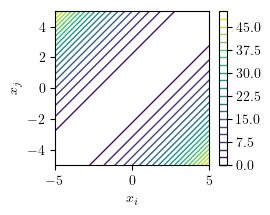

In [12]:
STEPS = 1000
RANGE = (-5.0, 5.0)
x = np.linspace(*RANGE, STEPS)
y = np.linspace(*RANGE, STEPS)
X, Y = np.meshgrid(x, y)
v_pair = v_pair_gt(X, Y)
fig, ax = plt.subplots(figsize=(2.5, 2))
cont = ax.contour(X, Y, v_pair, levels=20, linewidths=1.0)
fig.colorbar(cont, ax=ax)
ax.set_aspect("equal")
ax.set_xlabel(r"$x_i$")
ax.set_ylabel(r"$x_j$")
if SAVE_FIG:
    plt.savefig(f"{RES_DIR}/gt_v_pair.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()